<img src="./figures/Logo_KIT.svg" width="250" height="250" style="zoom:15%;float:right;" />

# Fakultät für Physik 

## Physikalisches Praktikum P2 für Studierende der Physik



Versuch P2-23, 24, 25 (Stand: April 2023)

[Raum F1-16](http://www-ekp.physik.uni-karlsruhe.de/~simonis/praktikum/layoutobjekte/Lageplan_P1.png)

Name: Stier Vorname: Jonah E-Mail: uifed@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Mutter Vorname: Raphael E-Mail: unodw@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo31

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

 
Betreuer: Simon Geisert

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 13.05.2024

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Vermerk: __________________

# Laser-Optik, Teil B

## Motivation

Im Versuch [Laser-Optik, Teil A](https://git.scc.kit.edu/etp-lehre/p2-for-students/-/tree/main/Laser-Optik_Teil_A) haben Sie sich mit Hilfe einfacher Messungen mit den grundlegenden Eigenschaften und den Anwendungen von Lasern vertraut gemacht. In diesem Versuch können Sie Ihre experimentellen Erfahrungen um die Anwendung komplexerer interferometrischer Methoden zur Bestimmung kleinster Längenänderungen und um die Untersuchung der Eigenschaften doppelbrechender Kristalle mit Hilfe von linear polarisiertem Laserlicht erweitern. Den eigentlichen Versuchsteilen ist ein Demonstrationsversuch zur Veranschaulichung der Fourier-Transformation und ihrer Bedeutung in der Physik vorangestellt, der nahtlos an die Aufgaben des Versuchs "Laser-Optik, Teil A" anschließt. Beachten Sie hierzu die Hinweise zu diesem Versuch.

## Lernziele

Wir listen im Folgenden die wichtigsten **Lernziele** auf, die wir Ihnen mit dem Versuch **Laser-Optik, Teil B** vermitteln möchten: 

- Sie untersuchen den Zusammenhang zwischen dem physikalischen Phänomen der Beugung, als Streuung von (kohärentem) Licht und der Fourier-Transformation, am Beispiel der Beugung am Einfachspalt. Dabei haben Sie die Möglichkeit eine vollautomatisierte Messanordnung genauer kennenzulernen.
- Sie untersuchen zwei Anwendungen für exakte interferometrische Messungen kleinster Längenänderungen. Dabei handelt es sich um die sehr kleinen [(magnetostriktiven) Längenänderung](https://de.wikipedia.org/wiki/Magnetostriktion) von Nickel und um die direkte Bestimmung der Wellenlänge des verwendeten Laserlichts selbst.
- Sie untersuchen den [Dopplereffekt von Licht](https://de.wikipedia.org/wiki/Doppler-Effekt#Longitudinaler_Doppler-Effekt), als intelligent durchdachte Anwendung des [Michelson-Interferometers](https://de.wikipedia.org/wiki/Michelson-Interferometer). 
- Sie verwenden die Eigenschaft der linearen Polarisation des Laserlichts um den (Kristall im $\vec{B}$-Feld) [Faraday-](https://de.wikipedia.org/wiki/Faraday-Effekt) und (Kristall im $\vec{E}$-Feld) [Pockels-Effekt](https://de.wikipedia.org/wiki/Pockels-Effekt) zu studieren. Dabei bestimmen Sie verschiedene Materialkonstanten entsprechender [doppelbrechender Kristalle](https://de.wikipedia.org/wiki/Doppelbrechung).
- Sie untersuchen die [optische Aktivität](https://de.wikipedia.org/wiki/Optische_Aktivit%C3%A4t) von Zuckerlösungen. Auch hierzu verwenden Sie die Eigenschaft der linearen Polarisation des kohärenten Laserlichts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kafe2
import uncertainties.unumpy as unp
from uncertainties import ufloat

## Versuchsaufbau

Auf einer optischen Bank können neben einem $\mathrm{He}$-$\mathrm{Ne}$-Laser die optischen Aufbauten für die durchzuführenden Versuche montiert werden. Die Versuche befinden sich in separaten Kabinen. Ein Beispielaufbau ist in der folgenden Photographie abgebildet: ([Link](https://git.scc.kit.edu/etp-lehre/p2-for-students/-/raw/main/Laser-Optik_Teil_B/figures/LaserB.jpg))   

<img src="./figures/LaserB.jpg" style="zoom:100%;" />

Für die verschiedenen Versuchsteile stehen Ihnen die folgenden Geräte und Materialien zur Verfügung: 

- Ein Experimentiertisch (mit $3\,\mathrm{m}$-Zeißschiene) mit diversen Verschiebereitern.
- Ein $2\,\mathrm{mW}$-$\mathrm{He}$-$\mathrm{Ne}$-Laser mit $\lambda_{0}=632,8\,\mathrm{nm}$ Wellenlänge (in geschlossener Bauweise mit integriertem Netzteil, mit polarisiertem Licht). 
- Ein Strahlaufweitungssystem (wie im Versuch Laser-Optik, Teil A), Justieraufbau mit Fassungen, Halter für Linsen und Blenden und ein großer weißer Schirm.
- Ein Multimeter (Voltcraft in verschiedenen Ausführungen).
- Ein Ampèremeter (Gossen Manometer, ohne Zusatzwiderstände $100\,\mathrm{mV}/1\,\mathrm{mA}$ (Vorsicht bei der Bedienung!), dazu [Shunt](https://de.wikipedia.org/wiki/Shunt_(Elektrotechnik))-Widerstände für $500\,\mathrm{mA}$ und für $5\,\mathrm{A}$ zur Messung der Spulenströme.
- Ein Funktionsgenerator FG 800/$0,2\,\mathrm{Hz}–200\,\mathrm{kHz}$.
- Ein Netzgerät für die Gleichspannung an der Pockelszelle, einstellbar bis $\approx1900\,\mathrm{V}$ mit integriertem Modulationstransformator.
- Jeweils ein Nieder (NF)- und Audiofrequenz(AF)-Verstärker.
- Ein Stromversorgungsgerät/Labor-Netzgerät (stufenlos und kurzzeitig bis zu $4\,\mathrm{A}$ einstellbar).
- Ein Glan-Thompson Polarisationsfilter; Durchmesser $d=10\,\mathrm{mm}$, auf einem Stift drehbar montiert mit Winkelskala ([Extinktionsverhältnis](https://de.wikipedia.org/wiki/Extinktionsverh%C3%A4ltnis): $10^{5}/1$). **Diesen Filter dürfen Sie nicht im unaufgeweiteten Strahl benutzen!**
- In $25\,\mathrm{mm}$-Fassungen:
  - Ein Polarisationsfilter ohne Skala (nicht an allen Plätzen verfügbar),
  - Ein Spalt der Breite $b=0,4\,\mathrm{mm}$,
  - Eine Lochblende mit Durchmesser $d=1\,\mathrm{mm}$ (nicht an allen Plätzen verfügbar),
  - Eine Irisblende,
  - Ein [Achromat](https://de.wikipedia.org/wiki/Achromat) mit Brennweite $f=10\,\mathrm{mm}$,
  - Sammellinsen mit Brennweiten $f=30\,\mathrm{mm}$, $60\,\mathrm{mm}$
    und $150\,\mathrm{mm}$ (die Linse mit $f=60\,\mathrm{mm}$ ist nicht an allen Plätzen verfügbar),
  - Tischlampe, Taschenlampe, 2 Laserschutzbrillen (nicht vollständigan allen Plätzen verfügbar).

- Im Schrank:
  - Lichtdetektor Si-Photoelement BPW34 (kleinflächig), $2,7\,\mathrm{mm}\times2,7\,\mathrm{mm}$, nur im Elementbetrieb, d.h. ohne Betriebsspannung direkt an Spannungs- oder Strommessgerät angeschlossen, zu verwenden. Der Anschluss erfolgt an den mit "+" und "-" bezeichneten Stiften mit jeweils spezieller Leitung (einfach vorhanden).
  - Lichtdetektor Si-Photoelement, Durchmesser $d=12\,\mathrm{mm}$, wie bei Versuchsteil A (einfach vorhanden).
  - Lichtdetektor für moduliertes Licht (mit Photoelement $2,7\,\mathrm{mm}\times2,7\,\mathrm{mm}$, NF-Verstärker und Lautsprecher).
  - Ein Michelson-Interferometer mit Feinverstellung eines Spiegels durch $(10:1)$-Hebeluntersetzung und Mikrometerschraube, eine dazu aufsteckbare Antriebsrolle für Motorantrieb (drei mal vorhanden).
  - Ein Michelson-Interferometer, ein Spiegel auf einem $\mathrm{Ni}$- bzw. $\mathrm{Fe}$-Stab befestigt, Länge $\ell=105\,\mathrm{mm}$, in einer Spule mit $n=2000$ Windungen (jeweils einmal vorhanden).
  - Ein Synchronmotor ($1\,\mathrm{U/min}$, mit Antriebsrolle und Gummiriemen für die Bewegung des Interferometerspiegels).
  - Eine Küvette ($198\,\mathrm{mm}\times58\,\mathrm{mm}$), in einem Halter auf einem Stift, für optisch aktive Lösungen (zweimal in Plastik- und einmal in Glasausführung).
  - Haushaltszucker in zwei Gefäßen.
  - Eine Chemikalienwaage, $1\times$ Mettler H 315 auf einem Wägetisch und drei verschiedene mechanische Waagen.
  - Bechergläser, Messzylinder, Trichter.
  - Sorbose-Lösung (optisch aktiv, linksdrehend, Massenkonzentration $\beta=0,33\,\mathrm{g\,cm^{-3}}$).
  - Faraday-Modulator, Bleisilikatglas der Länge $\ell=75\,\mathrm{mm}$ in einer Spule mit $n=800$ Windungen.
  - Ein Radioapparat mit Zweitlautsprecherausgang und zugehöriger Anschlussleitung, als Modulationsquelle.
  - Ein Lichtdetektor für moduliertes Licht (mit Photoelement $2,7\,\mathrm{mm}\times2,7\,\mathrm{mm}$, NF-Verstärker und Lautsprecher).
  - Pockelszelle im Drehhalter mit Skala zur Angabe des Winkels zwischen Feld- und Laserpolarisationsrichtung, Lithiumniobat-Kristall,
    Höhe $h=2\,\mathrm{mm}$ (entspricht dem Elektrodenabstand), Länge $\ell=20\,\mathrm{mm}$, optische Achse parallel zur Feldrichtung.
  - Stimmgabel $1700\,\mathrm{Hz}$ ($2\times$), Maßband ($1\times$) , Stoppuhr ($5\times$).
  - Aufbau für die optische Bank mit Fototransistor, Schrittmotor und Endschaltern.
  - Vorverstärker, Schrittmotor- und Relais-Schnittstelle.
  - 2 Laserschutzbrillen (für das Betreuungspersonal).
  - Rechner (IBM-kompatibler PC 386SX) mit VGA-Graphikkarte, Graphik-Drucker, Maus, Festplatte, $1,2\,\mathrm{MB}$ und $1,44\,\mathrm{MB}$-Laufwerk und spezieller Schnittstellen-Karte (ADC, DAC, PIO), (nur einmal vorhanden).



## Wichtige Hinweise

- Bei diesem Versuch arbeiten Sie mit einem Laser, der entsprechend **gefährlich für Ihre Augen** sein kann. Gehen Sie daher **vorsichtig und verantwortungsbewusst** mit dem Laser um und halten Sie sich an die Anweisungen des/der Tutor:in.
- Achten Sie darauf, dass alle Personen im Raum bei der Durchführung des Versuchs eine **Schutzbrille** tragen. 
- Vermeiden Sie direkten Blickkontakt mit dem Laserstrahl und richten Sie ihn niemals auf andere Personen. Bleiben Sie beim Experimentieren in der Regel stehen, mit den Augen also weit oberhalb der Strahlhöhe.
- Stellen Sie sicher, dass die Laserleistung und -frequenz auf die vorgesehenen Werte eingestellt sind und überprüfen Sie dies regelmäßig während des Experiments.
- Beachten Sie, dass der Laserstrahl bei falscher Handhabung Schäden an optischen Elementen verursachen kann. Verwenden Sie nur die bereitgestellten optischen Elemente und reinigen Sie sie nur mit geeigneten Materialien.
- Vor dem Einschalten des Lasers müssen alle Geräte sorgfältig aufgebaut und justiert werden. Führen Sie diese Schritte **erst nach Rücksprache mit dem/der Tutor:in** durch.

## Durchführung

### **Aufgabe 1: Beugungsbild eines Spalts**

Hierbei handelt es sich um einen **Demonstrationsversuch**. Er soll von allen Gruppen gemeinsam und mit Unterstützung des Betreuers durchgeführt werden. Mithilfe eines auf einen Schrittmotor montierten Phototransistors messen Sie das Beugungsbild eines Spalts aus, der mit einem $\mathrm{He}$-$\mathrm{Ne}$-Laser ausgeleuchtet wird. Die gewonnenen Daten werden auf einem bereitstehenden Computer verarbeitet; aus der [Fourier-Rücktransformation](https://de.wikipedia.org/wiki/Fourier-Transformation) des aufgezeichneten Beugungsbildes erhalten Sie das Bild des Spalts. Dokumentieren und diskutieren Sie Ihre Beobachtungen. 

---

Tritt das Licht auf Einzelspalt, so wird es nach der Frauenhofer beugung an diesem gestreut, das resultierende Beugungsintegral ergibt sich durch die Eindimensionale Fourier-Transformation:

$$
\check{T}(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}T(x)\,e^{-ikx}dx
$$

dabei bildet dann $I \propto |\check{T}(x)|^2$ die Intensität.


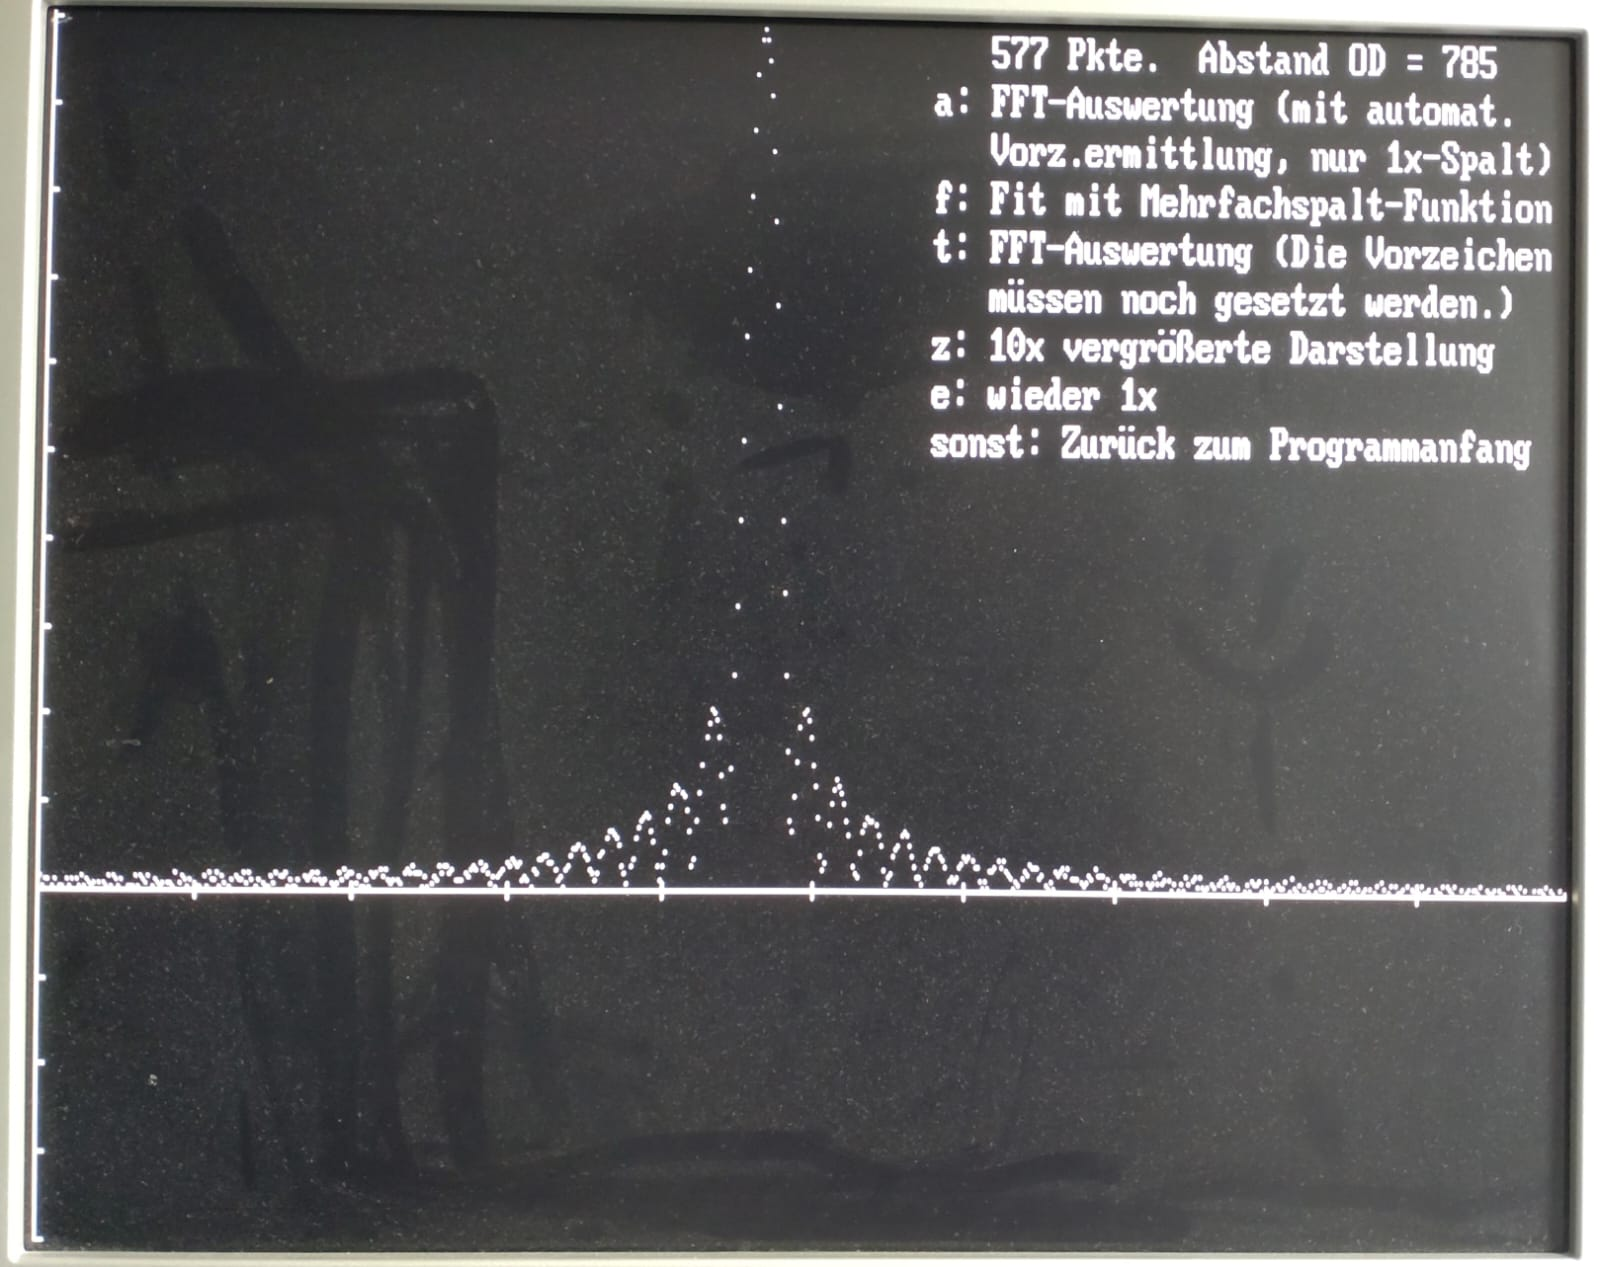

Durch die numerische Rücktransformation von

$$
T(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\check{T}(x)\,e^{ikx}dx
$$

Ergibt sich aus dem Interferenumster eine Angabe über die Spaltbreite:

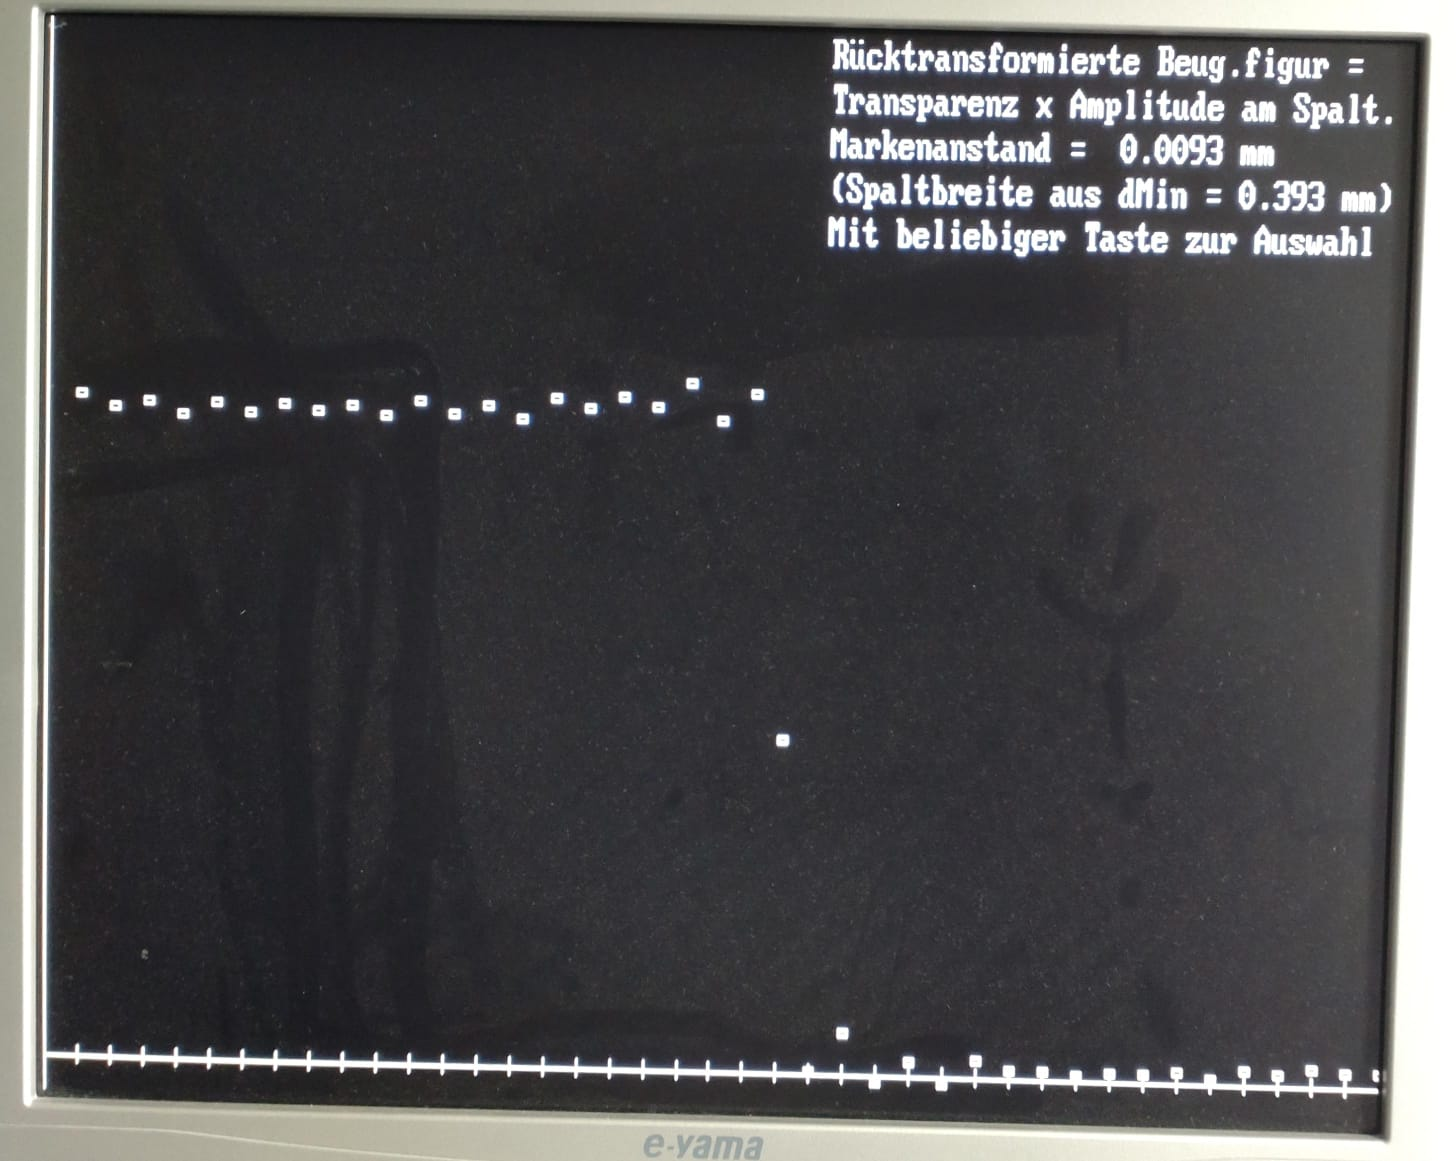

### **Aufgabe 2: Anwendungen des [Michelson-Interferometers](https://en.wikipedia.org/wiki/Michelson_interferometer)**

**2.1:** Beobachten Sie interferometrisch die sehr geringe Abhängigkeit der Länge von Nickel vom Magnetfeld $\vec{H}$ und bestimmen Sie den [Magnetostriktionskoeffizienten](https://de.wikipedia.org/wiki/Magnetostriktion).

**2.2:** Bestimmen Sie aus den beobachteten Änderungen des Interferenzbildes bei gemessener Verschiebung eines der Spiegel die Wellenlänge des Laserlichts.

**2.3:** Demonstrieren Sie den "[Dopplereffekt](https://de.wikipedia.org/wiki/Doppler-Effekt#Longitudinaler_Doppler-Effekt)" mit Lichtwellen im Fall $v\ll c$ und messen Sie $v$ interferometrisch.

**2.4:** Bewegen Sie eine schwingende Stimmgabel von Ihrem Ohr weg und auf Ihr Ohr zu und zwar einmal mit und einmal ohne eine reflektierende Wand in der Nähe (akustisches Analogon zu Aufgabe 2.3). Dokumentieren und disutieren Sie Ihre Beobachtungen.

---

**2.1**

Für das Magnetfeld in der Spule kann über die bekannte Formel 

$
H = \frac{N}{l}\,I
$

im allgemeinen nicht genau bestimmt werden. Sie geht von dem Extremfall einer unendlich langen Spule aus, was hier nicht zutrifft.

Stattdessen wird hierfür ein eigens geschriebenes Simulationsprogramm genutzt, um das Feld im Zentrum der Spule bei $I = 1A$ zu berechnen:

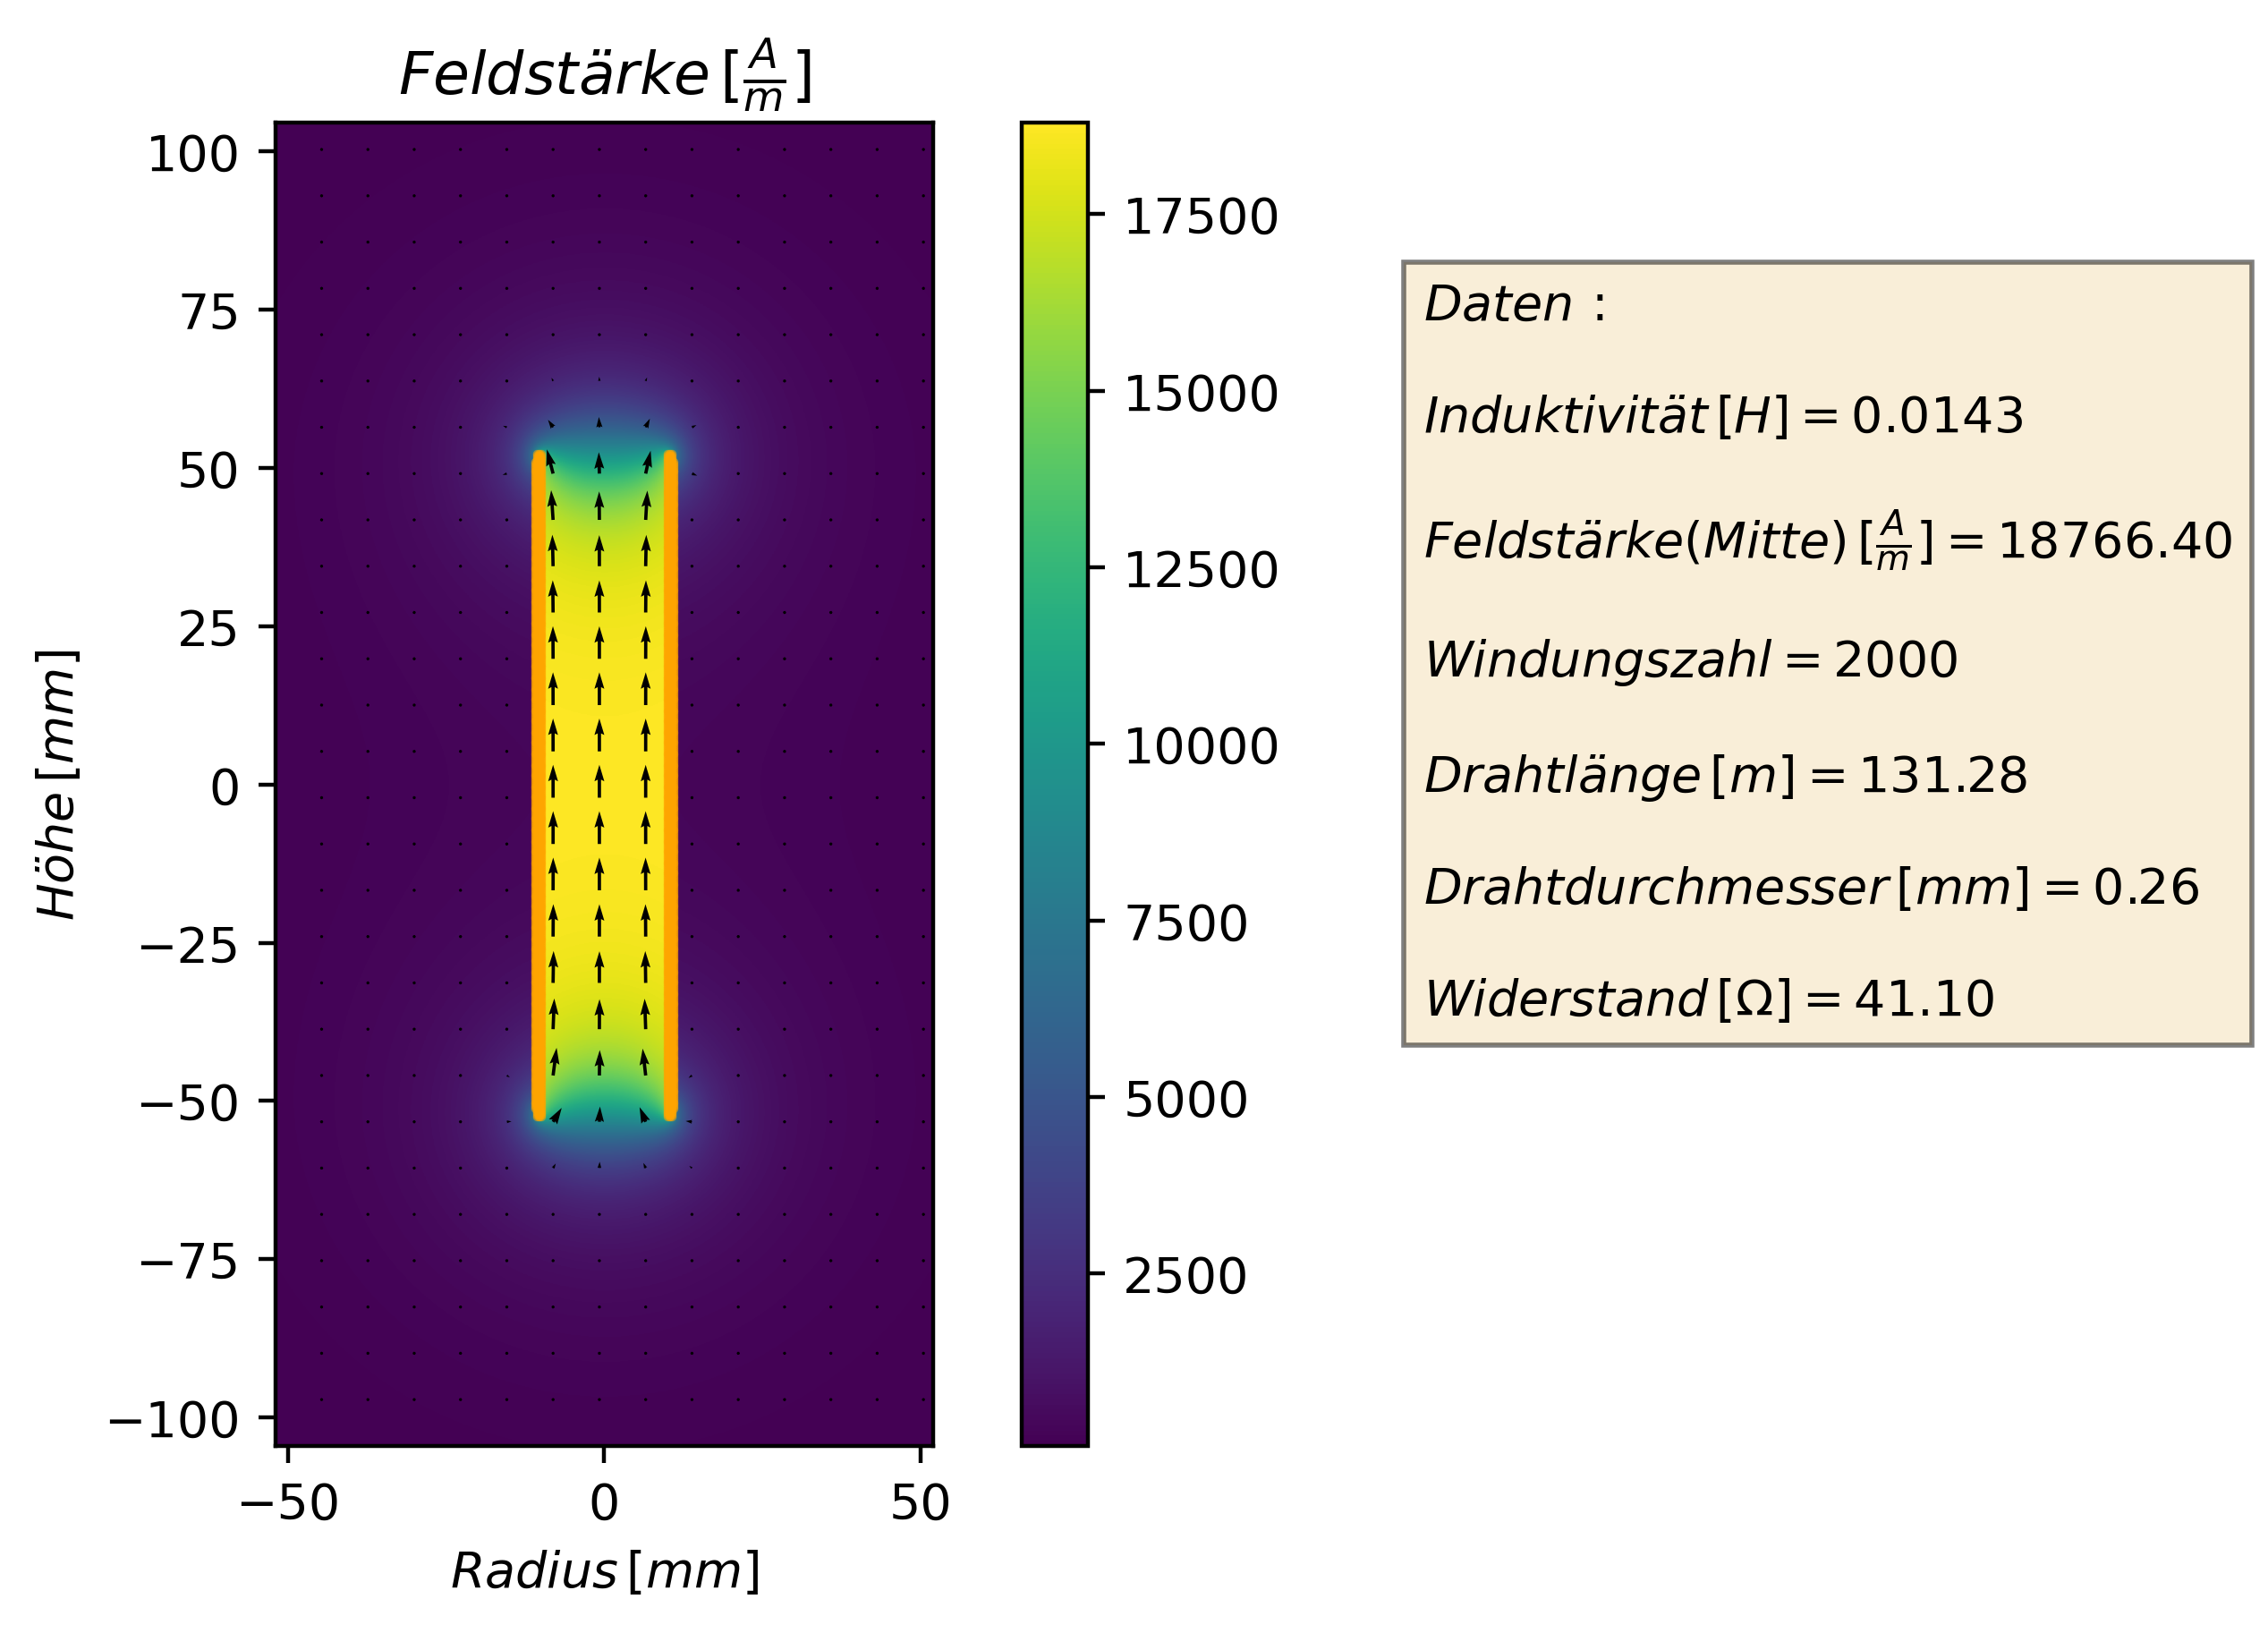

In [2]:
from tools.CoilCalc import Spule
l = 0.105 #Länge in Meter
n = 2000 #Windungen der Spule
s = Spule(n,l,0.02,0.0226)
s.plot()

Anschließend muss die Felstärke im Zentrum der Spule von Ende zu Ende integriert, und der Mittelwert gebildet werden.

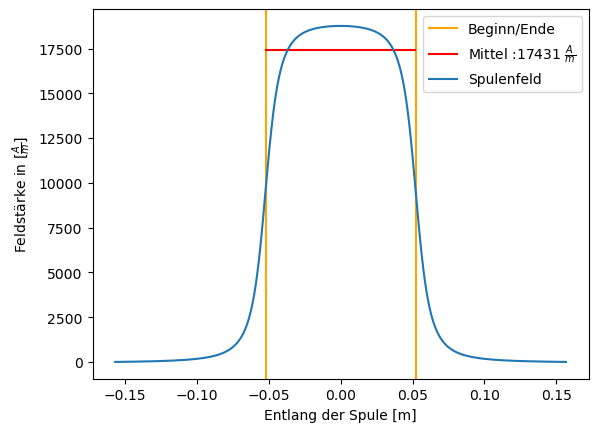

In [3]:
field = s.field_c[1,:,0]
x_values = s.stepsize*np.arange(-len(field)/2,len(field)/2)
mittel = np.mean(field[403:797])
plt.axvline(200*s.stepsize,color='Orange',label='Beginn/Ende')
plt.axvline(-200*s.stepsize,color='Orange')
plt.axhline(mittel,0.35,0.65,color='red',label=f'Mittel :{round(mittel)}'+r' $\frac{A}{m}$')
plt.plot(x_values,field,label='Spulenfeld')
plt.xlabel(r'Entlang der Spule [m]')
plt.ylabel(r'Feldstärke in $[\frac{A}{m}]$')
plt.legend()
plt.show()

Vergleichen wir dieses Ergebniss nun mit der analytischen Lösung, so erhalten wir einen Korrekturfaktor. Damit lautet die neue Proportioanlität:

$H = \gamma\,I$

mit 

$\gamma = 17338\pm93\,\frac{1}{m}$

Der Fehler ergibt sich aus der Unsicherheit von $\Delta l = 0.5mm$ und der sich daraus resultierenden Verschiebung des Integrationsbereichs und der Veränderung der allgemeinen Feldstärke

**Nun widmen wir uns der Berechnung des Magnetostriktionskoeffizeinten zu.**

Für den Magnetostriktionskoeffizienten parallen zum Magnetfeld gilt:

$H\,k={\frac {\Delta l}{l_{0}}}$

Für einen n-periodischen Durchlauf gilt:

$\Delta l = \frac{\lambda}{2(n-1)}\,a,$  $a\in N$

somit gilt:

$I\,\gamma={\frac {\lambda\,a}{2(n-1)\,l_{0}\,k}}$

$I=c\,a$ mit $c = \frac {\lambda}{2(n-1)\,l_{0}\,k\,\gamma}$



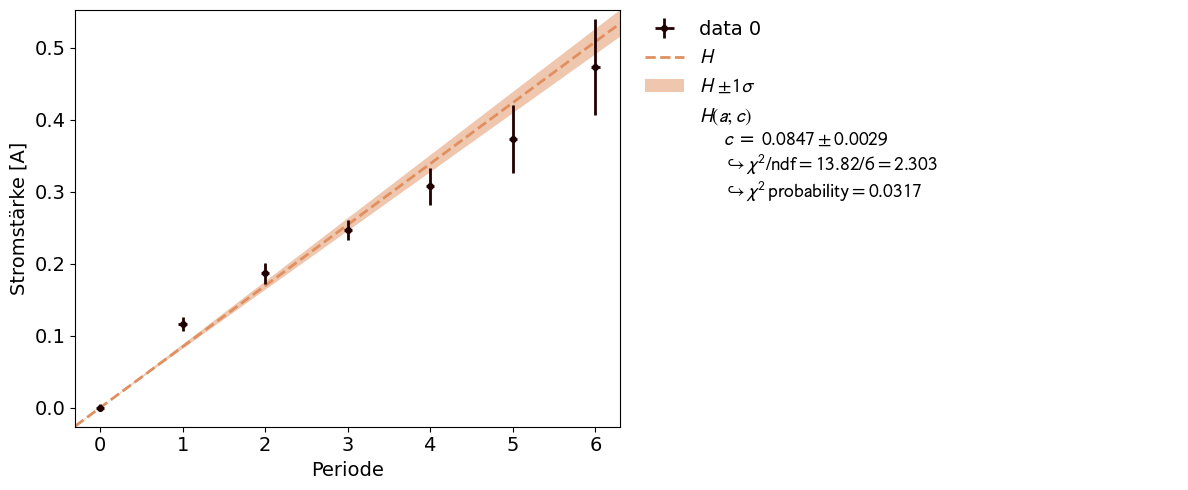

In [4]:
mi = [[0,0.125,0.205,0.250,0.290,0.335],[0,0.113,0.175,0.232,0.285,0.330,0.389,0.426],[0,0.114,0.178],[0,0.115,0.189],[0,0.117,0.188,0.248,0.322,0.397,0.495],[0,0.112,0.185,0.256,0.332,0.431,0.536]]

uncertain = 0.005

max = 7

ns = np.arange(max)

means = []
stds = []
for messpunkt in range(max):
    messpunkte = []
    for messreihe in mi:
        if len(messreihe)> messpunkt:
            messpunkte.append(messreihe[messpunkt])
    means.append(np.mean(messpunkte))
    stds.append(np.std(messpunkte))
    

def H(a,c):
    return c*a

cont = kafe2.XYContainer(ns,means)
cont.add_error('x',0.05)
cont.add_error('y',np.array(stds)+uncertain)
contfit = kafe2.Fit(cont,H)
contfit.do_fit()
contplot = kafe2.Plot(contfit)
contplot.y_label = 'Stromstärke [A]'
contplot.x_label = 'Periode'
contplot.plot()
plt.show()


Bemerkenswert an diesem Plot is die Position des ersten Periodendurchganges. Trotz seiner relativ kleinen Unsicherheit, welche sich aus der standardabweichung der 6 Messreihen und dem systematischen Messfehler von 

$\Delta I = \pm5 mA$ und : Ablesefehler vom Multimeter während der Messung

$\Delta Periode(a)=\pm 0.05$ : Messfehler beim erkennen des Periodendurchgangs auf dem Schirm

ergibt, liegt sie ausßerhalb der Ausgleichgeraden und ihrer Unsicherheit.

Dies kann durch mehrere Faktoren erklärt werden:

- Temperaturabhängiger Brechungsindex/Expansion:
Durch den zunehmenden Strom und die längere Betriebsdauer bei höheren Perioden heizt sich die Nickel-Probe immer weiter auf. Dieses Verhalten konnte wärend des Experimentes besonders bei sehr hohen Strömen beobachten lassen.

- Nichtlinearität Magnetostriktion:
Es es außerdem möglich, dass die Magnetostriktion nur in gute Näherung um den Nullpunkt als linear angesehen werden kann, und dies außerhalb nicht gilt.

Es wurde sich dazu entschlossen, vorallem aus dem Grund der Erhitzung, für die Bestimmung des Magnetostriktioinskoeffizienten nur die Messungen für das Erreichen des ersten Periodendurchganges zu verwenden, und die gewonnen Werte aus dem Plot bis auf weiteres zu verwerfen. Um ein Ergebniss aus den Daten von Durchgängen höherer Ordnung zu gewinnen müssten zusätzliche Parameter wie Hitze hinzugefüht werden, mit welchen man das Modell bereinigen könnte. Allerdings stehen diese in diesem Aufbau leider nicht zu verfügung. 

Damit ergibt sich die konstante c:

$k = \frac {\lambda}{2(n-1)\,l_{0}\,c\,\gamma}$

In [5]:
c = ufloat(means[1],stds[1]+uncertain)/ufloat(1,0.05) #Steigung zum ersten Periodendurchgang
wave = 632.8*10**(-9)
n = 1.958 #Literautrwert für Nickel bei Wellenlänge von 632.8nm (https://www.filmetrics.de/refractive-index-database/Ni/Nickel)
wave/((1.958-1)*ufloat(l,0.0005)*c*ufloat(17338,93))/2

1.563956533999611e-09+/-1.48431117527763e-10

Damit erhalten wir eine Magnetrestriktionskonstante von 

$k = 1.564\pm0.148 \,*10^{-9}[\frac{m}{A}]$

**2.2**

Um die Verschiebung der Messapperatur in Abhängigkeit der durlaufenen Maxima darzustellen, wurde der lineare Zusammenhang

$D = c\,n$ 

verwendet.

Dabei steht $D$ für die verschiebung der Apperatur und $n$ für die Anzahl der durlaufenen Perioden.

In [6]:
erste = np.array([0,16.5,19.9,23.9,26.1,29.0,32.0,34.8,37.7,40.1,43.0,45.6])*10**(-6)

allezehnmaxima = np.array([0,16.18,31.0,45.94,59.64,72.91,85.56,98.19,110.46,122.39,136.33])*10**(-6)

zähler = np.arange(0,len(allezehnmaxima)*10,10)
erstez = np.arange(0,len(erste))*10+40
erstez[0] = 0

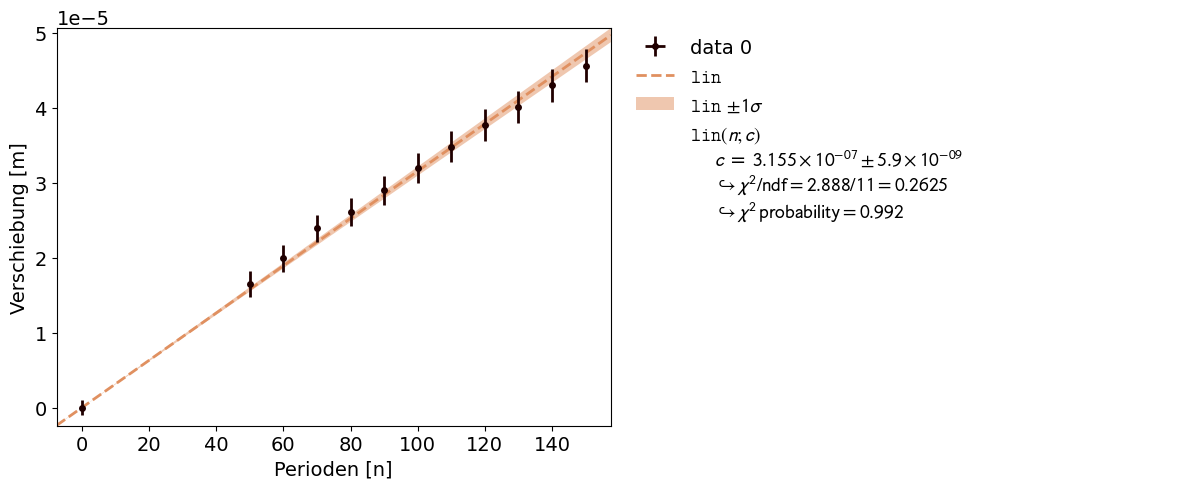

In [7]:
def lin(n,c):
    return c*n

linfit = kafe2.XYContainer(erstez,erste)
linfit.add_error('y',0.1*np.sqrt(erstez+0.00001)*10**(-6)+10**(-6))
fit = kafe2.Fit(linfit,lin)
fit.do_fit()
fitplot = kafe2.Plot(fit)
fitplot.x_label = 'Perioden [n]'
fitplot.y_label = 'Verschiebung [m]'
fitplot.plot()
plt.show()

Der Fehler bei der Messung setzt sich aus 2 Komponenten zusammen.

Zum einen ergibt sich der notwendige Fehler beim Ablesen des Periodendurchganges von 

$\Delta D_{konst} = \pm 1\mu m$

Zum anderen ist davon auszugehen, dass beim Messen der jeweils 10 aufeinanderfolgenden Periodendurchläufe es vorkommen kann, dass das 9. bzw 11 Maxima fälschlicherweise als 10. interpretiert wurde. Dieser Fehler setzte sich dann immer weiter fort, weshalb die Unsicherheit 

$\Delta D_{aufsteigend} = \pm \frac{\sqrt{n}}{10}\,\mu m\,,\,$ $n \in [50,60,70,...]$

für eine höher werdende Periodenanzahl immer weiter steigt.

Die Fehler scheinen richtig eingeschätzt worden zu sein, da der Fit mit einer sehr hohen $\chi^2$-Wahrscheinlichkeit auf eine gute Modell hinweisen.

In [8]:
ufloat(fit.parameter_values[0],fit.parameter_errors[0])*2

6.309177935648336e-07+/-1.1872052834323458e-08

$\lambda_{Laser} = 2\,c$

$\lambda_{Laser} = 630.9\pm11.9\, \mathrm{nm}$

Der angegebene Wert $\lambda_{0}=632,8\,\mathrm{nm}$ liegt damit innerhalb der Unsicherheit des bestimmten Wertes.





**2.3**

Als erstes muss die Geschwindigkeit der durch den Motor nach vorne bewegten Platte bestimmt werden.

Dazu wird die gemessene Zeit als Funktion des zurückgelegten Weges dargestellt:

$
t = c\,x\,,\,c=\frac{1}{v}
$

Als Fehler für das Ablesen der Micrometerschraube wurde $\Delta x = \pm 0.1 \mathrm{\mu m}$, und für die Zeit $\Delta t = \pm 0.1 \mathrm{s}$ angenommen.

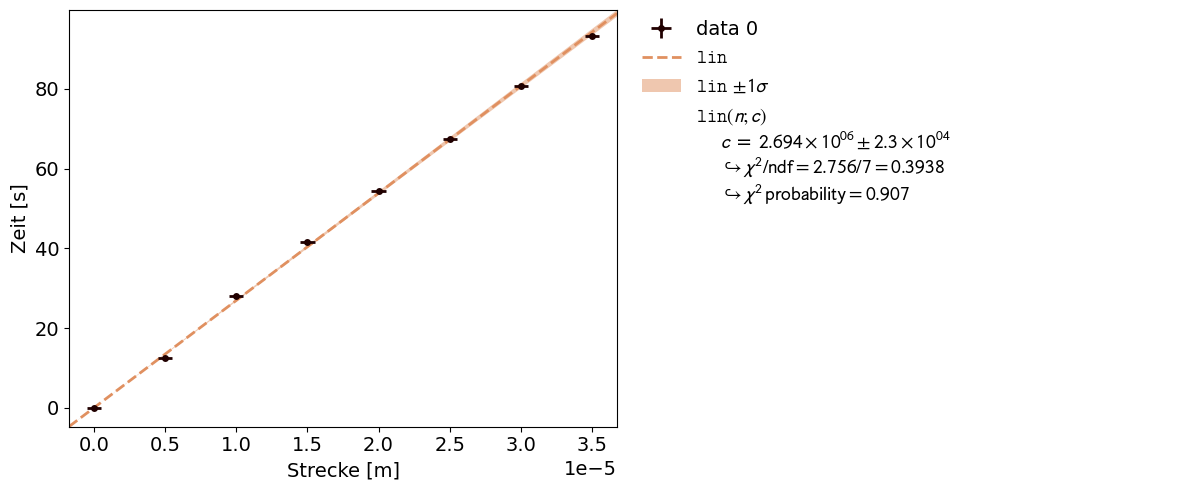

Damit erhalten wir eine Geschwindigkeit von (3.713+/-0.031)e-07 m/s


In [9]:
alle5micrometer = [0,12.47,28.13,41.65,54.31,67.55,80.63,93.39] #in sec
minimums = np.array([0,8.8,18.0,36.0,44.6,53.4,61.2,70.0,77.8,85.4,91.5,97.8,106.6,112.7])
minimums[3:] -= 10
alle5micrometer = [0,12.47,28.13,41.65,54.31,67.55,80.63,93.39] #in sec

data = kafe2.XYContainer(np.arange(0,len(alle5micrometer))*5*10**(-6),alle5micrometer)
data.add_error('x',0.5*10**(-6))
data.add_error('y',0.1)
speedfit = kafe2.Fit(data,lin)
speedfit.do_fit()
speedplot = kafe2.Plot(speedfit)
speedplot.y_label = 'Zeit [s]'
speedplot.x_label = 'Strecke [m]'
speedplot.plot()
plt.show()
v = 1/ufloat(speedfit.parameter_values[0],speedfit.parameter_errors[0])
print(
    f'Damit erhalten wir eine Geschwindigkeit von {v} m/s'
)


Nun soll überprüft werden, ob wir über den Dopplereffekt auf ein ähnliches Ergebniss kommen.

$
t = c\,n\,,\,c = \frac{\lambda}{2\,v}
$

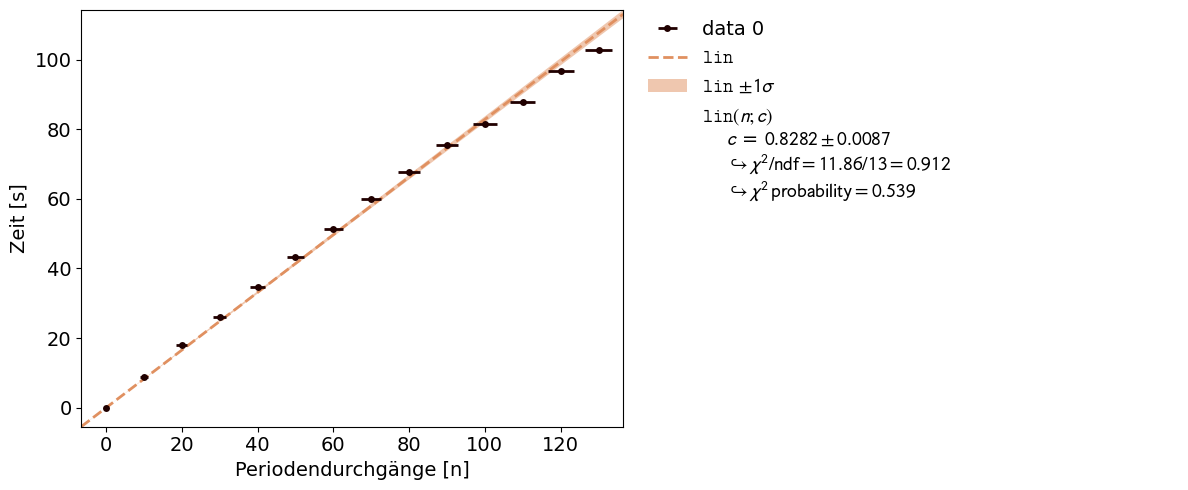

3.820534388399203e-07+/-3.998390207719906e-09

In [10]:
data2 = kafe2.XYContainer(np.arange(0,len(minimums))*10,minimums)
data2.add_error('x',np.sqrt(np.arange(0,len(minimums))+0.000001))
data2fit = kafe2.Fit(data2,lin)
data2fit.do_fit()
data2plot = kafe2.Plot(data2fit)
data2plot.y_label = 'Zeit [s]'
data2plot.x_label = 'Periodendurchgänge [n]'
data2plot.plot()
plt.show()
wave/2/ufloat(data2fit.parameter_values[0],data2fit.parameter_errors[0])

Es wurde wieder eine fehlerporgression mit $\Delta Periode = \sqrt{\frac{n}{10}}$. Also eine Periode Abweichung bei der Messung von 10 Perioden.

Damit erhalten wir ein Ergebniss von $v_{Doppler} = 382\pm40 \frac{\mathrm{nm}}{s}$, welches innerhalb seiner Unsicherheit mit unserem vorherigen Ergebnis $v_{Schraube} = 371\pm3 \frac{\mathrm{nm}}{s}$ übereinstimmt.

**2.4**

Bei sehr schneller Bewegung der Stimmgaben zum ohr hin und weg ist neben der Änderung der Lautstärke auch eine Ändungen des Tons und damit der Schwinungsfrequent des Instruments zu bemerken. Die Frequenz erhöht sich dabei beim bewegen der Stimmgabel hin zum Ohr und sinkt wieder bei der zurückbewegung. Dies ist analog zur 2.3 auf den Dopplereffekt zurückzuführen.

### **Aufgabe 3: Faraday- und Pockels-Effekt**

**3.1:**  Modulieren Sie die Intensität des Laserlichts durch Anwendung des [Faraday-Effekts](https://de.wikipedia.org/wiki/Faraday-Effekt), indem Sie das linear polarisierte Laserlicht erst einen Stab aus Bleisilikatglas im longitudinalen Magnetfeld einer Spule und dann einen Polarisationsfilter durchlaufen lassen.

**3.2:** Bestimmen Sie die [Verdet-Konstante](https://de.wikipedia.org/wiki/Verdet-Konstante) 

\begin{equation*}
V \equiv \frac{\alpha}{B\,l}
\end{equation*}



von Bleisilikatglas, wobei $B$ der Magnetfeldstärke und $l$ der Länge des Stabs entsprechen und $\alpha$ der Winkel ist, um den das linear polarisierte Licht beim Durchlaufen des Stabs gedreht wurde.

**3.3:**  Modulieren Sie die Intensität des Laserlichts durch Anwendung des [Pockels-Effekts](https://de.wikipedia.org/wiki/Pockels-Effekt), indem Sie das linear polarisierte Laserlicht einen Lithiumniobat-Kristall mit transversalem elektrischen Feld (Feldrichtung $45°$ gegen die Polarisationsrichtung des Laserlichts gedreht) und ein Polarisationsfilter ($90°$ gegen die Polarisationsrichtung des Laserlichts gedreht) durchlaufen lassen.

**3.4:** Bestimmen Sie die Konstante 

\begin{equation*}
k \equiv \frac{\Delta n(E)}{E}
\end{equation*}

für den Pockels-Effekt bei Lithiumniobat für die Wellenlänge des Laserlichts, wobei $\Delta n(E)$ der Änderung des Brechungsindex und $E$ der elektrischen Feldstärke entsprechen.

---

**3.1** 

Der Laser wird auf das Bleisilikatglas ausgerichtet im Anschluss daran wird ein Polarisationsfilter und danach die Photodiode mit Verstärker platziert. Anschließend wird der Filter so justiert, dass ein möglichst rauscharmes aber dennoch wahrnehmbares Signal zu hören ist. Es wird also die Intensität des einfallenden Lichtes auf die Photodiode moduliert indem die Polarisation des Lasers mit dem Glas gedreht wurde. Dadurch ist ein größerer Anteil des Lichtes orthogonal zum Filter polarisiert. Durch die Selbstinduktivität der Spule werden dabei hohe Töne schlechter wiedergegeben.  

**3.2**

Im folgenden nähern wir die Spule mit dem Bleisilikat als langgezogene Spule mit $B=\mu \frac{I\,n}{l}$ und mit $V \equiv \frac{\alpha}{B\,l}$ ist $\alpha=\mu VIn $. Dabei wurde angenommen, dass die Länge der Spule und die des Glases gleich groß sind. 

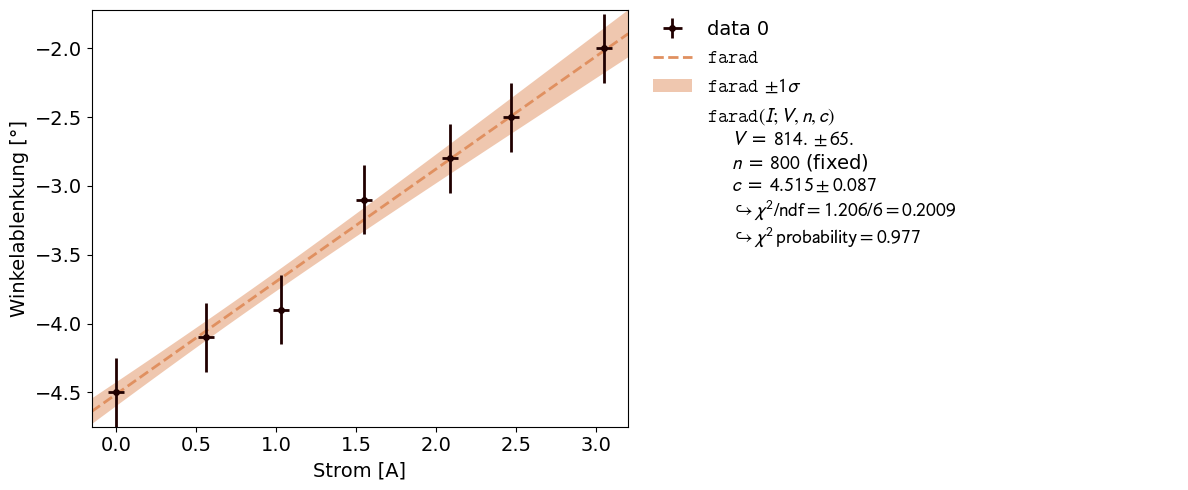

In [11]:
Faraday_akt=np.array([[0,4.5],[2.09,2.8],[1.03,3.9],[3.05,2],[2.47,2.5],[1.55,3.1],[0.56,4.1]])
mu = 1.25663706212*10**-6
def farad(I,V,n,c=4.5):
    return V*mu*n*I-c

Faraday_Akt_Cont = kafe2.XYContainer(Faraday_akt[:,0],-Faraday_akt[:,1])
Faraday_Akt_Cont.add_error(axis='x',err_val=0.05)
Faraday_Akt_Cont.add_error(axis='y',err_val=0.25)
Faraday_Akt_Cont.axis_labels=['Strom [A]','Winkelablenkung [°]']


Faraday_Akt_Fit = kafe2.Fit(Faraday_Akt_Cont,farad)
Faraday_Akt_Fit.fix_parameter(name="n",value=800)
Faraday_Akt_Fit.add_parameter_constraint(name="c",value=4.5,uncertainty=0.1)

Faraday_Akt_Fit.do_fit()

Faraday_Plot = kafe2.Plot(Faraday_Akt_Fit)
Faraday_Plot.plot()
plt.show()

Der Fit ergibt $V = 814\pm65\,\frac{°}{T\,m}$. Die Konatante $c$ stellt unseren Anfangswinkel dar der $-4.5°$ betrug und liegt somit im Rahmen der Messgenauigkeit. Das $\frac{\chi^2}{ndf}=0.2009$ ist etwas niedrig, jedoch noch in einem guten Bereich. Die $\chi^2$ Wahrscheinlichkeit ist mit $0.977$ gut. Die Fehler wurden folglich gut eingeschätzt.

**3.3**

Der Aufbau ist identisch zur $3.1$, dabei wurde der Glasstab durch die Pockelszelle ausgetauscht. Nun musste sowohl die Pockelszelle, als auch der Polarisationsfilter justiert werden. Dabei war die Wiedergabe hoher töne im Versuch besser, jedoch war die Wiedergabe deutlich verrauschter. Bei der Pockelszelle ist der Einfluss durch Impedanz deutlich geringer, da der Kondensator eine sehr geringe Kapazität im Vergleich zur Induktivität der Spule besitzt. Warum zur Demonstration des Effekts hier das licht nicht aufgeweitet werden musste erschließt sich uns nicht.  

**3.4**

Es  gilt $k \equiv \frac{\Delta n(E)}{E}$ und $\Delta\phi(U) = \frac{2\pi}{\lambda_{0}} \Delta n(U)\,\ell\rightarrow \Delta n(U)=\Delta\phi\frac{\lambda_{0}}{2\pi \ell}$  mit der Näherung $E=\frac{U}{d}$  folgt $\Delta \phi = U\frac{2\pi l k}{\lambda d}$. Für den Fehler auf die Spannungsmessung wird $20\,V$ verwendet und für die Phasenverschiebung $\frac{\pi}{4}$. Die Parameter waren mit  $\lambda=632.8\,nm,\  l=20\,mm,\ d=2\,mm$ gegeben. 

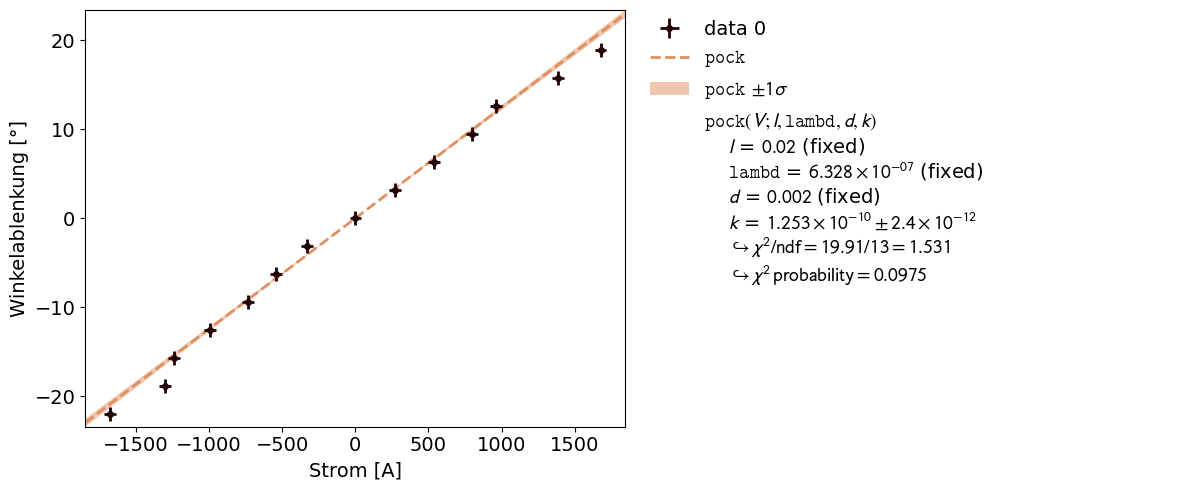

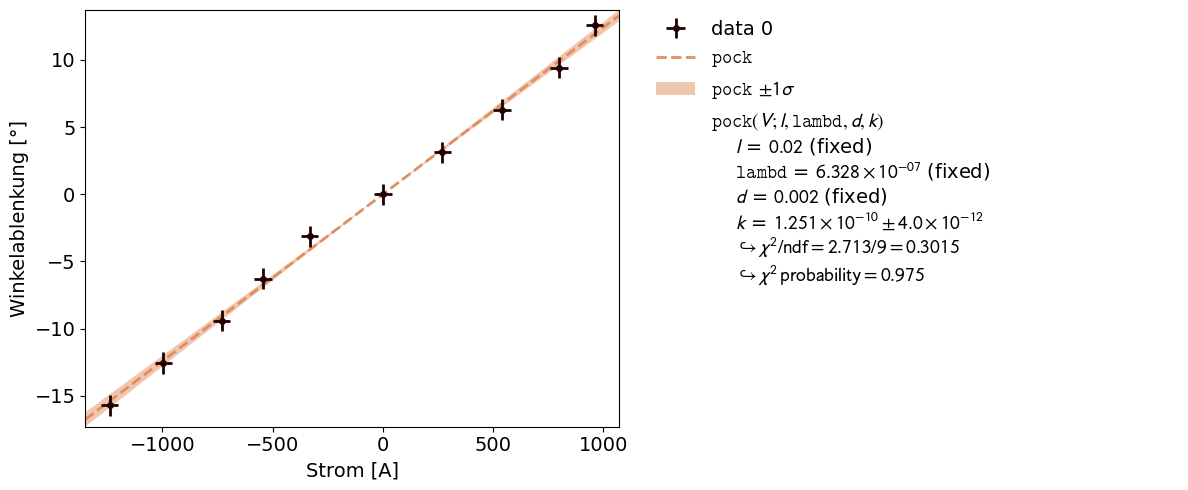

In [12]:
phase = np.pi*np.arange(-7,7)
pockels = np.array([-1679,-1300,-1240,-996,-732,-545,-333,0,270,539,799,960,1388,1677])
def pock(V,l,lambd,d,k=1*10**-10):
    return V*2*np.pi*l*k/(lambd*d)

Pockels_Cont = kafe2.XYContainer(pockels,phase)
Pockels_Cont.add_error(axis='x',err_val=40)
Pockels_Cont.add_error(axis='y',err_val=0.25*np.pi)
Pockels_Cont.axis_labels=['Strom [A]','Winkelablenkung [°]']


Pockels_Fit = kafe2.Fit(Pockels_Cont,pock)
Pockels_Fit.fix_parameter(name="lambd",value=632.8*10**-9)
Pockels_Fit.fix_parameter(name="d",value=2*10**-3)
Pockels_Fit.fix_parameter(name="l",value=20*10**-3)


Pockels_Fit.do_fit()

Pockels_Plot = kafe2.Plot(Pockels_Fit)
Pockels_Plot.plot()

Pockels_Cont2 = kafe2.XYContainer(pockels[2:-2],phase[2:-2])
Pockels_Cont2.add_error(axis='x',err_val=40)
Pockels_Cont2.add_error(axis='y',err_val=0.25*np.pi)
Pockels_Cont2.axis_labels=['Strom [A]','Winkelablenkung [°]']


Pockels_Fit2 = kafe2.Fit(Pockels_Cont2,pock)
Pockels_Fit2.fix_parameter(name="lambd",value=632.8*10**-9)
Pockels_Fit2.fix_parameter(name="d",value=2*10**-3)
Pockels_Fit2.fix_parameter(name="l",value=20*10**-3)


Pockels_Fit2.do_fit()

Pockels_Plot = kafe2.Plot(Pockels_Fit2)
Pockels_Plot.plot()

plt.show()

 Der erste Fit besitzt eine schlechte "goodness of fit". Es ist zu sehen, dass die letzten beiden Werte beider Messreihen (sowohl positive als auch negative Spannung) ähnlich abweichen. Wir schließen sie aus, besonders da der letzte Wert jeweils an vollem Ausschlag der Spannungsquelle gemessen wurde. Der zweite Fit ergibt so für $k=125.1\pm4\,\frac{pm}{V}$. Das $\frac{\chi^2}{ndf}=0.3015$ ist wieder  etwas niedrig, jedoch deutlich besser als beim  ersten Fit. Die $\chi^2$ Wahrscheinlichkeit ist mit $0.975$ gut. Damit ist der Fit gut.

### **Aufgabe 4: [Optische Aktivität](https://de.wikipedia.org/wiki/Optische_Aktivit%C3%A4t) (Saccharimetrie)**

**4.1:** Bestimmen Sie den [spezifischen Drehwinkel](https://de.wikipedia.org/wiki/Optische_Aktivit%C3%A4t#Spezifischer_Drehwinkel) 

\begin{equation*}
\left[\alpha\right]_{\lambda}^{T} = \frac{\alpha}{\beta\,\ell}
\end{equation*}



einer Haushaltszuckerlösung bei verschiedenen Massenkonzentrationen $\beta$ (gemessen in $\mathrm{g\,cm^{-3}}$) sowie die Drehrichtung. Dabei entsprechen $\alpha$ dem unspezifischen (gemessenen) Drehwinkel gemessen in $^{\circ}$ und $\ell$ der Länge des Lichtweges durch die Lösung (gemessen in $\mathrm{dm}$). Zeigen Sie, dass $\alpha\propto\ell$ und $\alpha\propto \beta$ gilt.  

Zum Nachweis von $\alpha\propto\ell$ genügt es zwei Messwerte aufzunehmen bei denen die Küvette mit der Probelösung einmal längs und einmal quer durchstrahlt wird. Zum Nachweis von $\alpha\propto\beta$ beginnen Sie z.B. bei $\beta\approx 0,3\,\mathrm{g\,cm^{-3}}$ und reduzieren Sie die Konzentration, indem Sie Wasser zugießen. Diskutieren Sie von welchen weiteren Parametern $\alpha$ noch abhängt. 

Wenn Sie die Konzentration ändern, während Sie den durchtretenden Laserstrahl beobachten, scheint dieser "krummen Bahnen" zu folgen. Beachten Sie Ähnlichkeiten zwischen der optischen Aktivität und dem Faraday-Effekt.

**4.2:** Bestimmen Sie den spezifischen Drehwinkel einer entgegengesetzt drehenden [Sorbose](https://de.wikipedia.org/wiki/Sorbose)-Lösung mit vorgegebener Konzentration.

---

Die Konzentration ist mit $\beta=\frac{m}{V}$. Für den Fit verwenden wir $\alpha = \beta\, l \left[\alpha\right]_{\lambda}^{T}+c$ Wobei $c$ dem Winkel des Lasers ohne Ablenkung entspricht. 

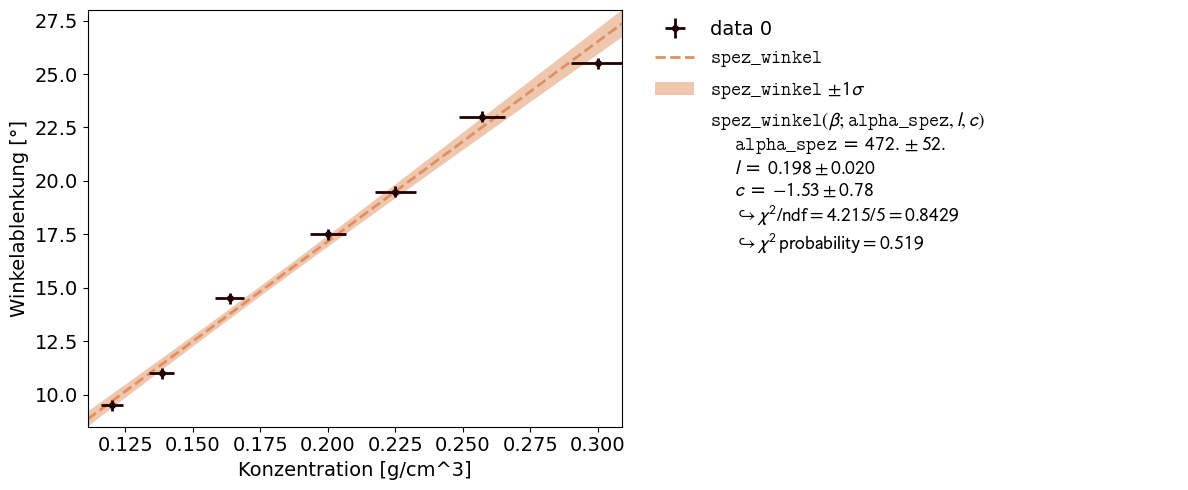

In [13]:
opt_akt=np.array([[0.3,-25.5],[0.35,-23.0],[0.4,-19.5],[0.45,-17.5],[0.55,-14.5],[0.65,-11.0],[0.75,-9.5]])
err_vals=3/(1000*opt_akt[:,0])

def spez_winkel(beta,alpha_spez=1,l=0.1,c=0):
    return beta*alpha_spez*l+c

Opt_Akt_Cont = kafe2.XYContainer(90/(1000*opt_akt[:,0]),-opt_akt[:,1])
Opt_Akt_Cont.add_error(axis='x',err_val=err_vals)
Opt_Akt_Cont.add_error(axis='y',err_val=0.25)
Opt_Akt_Cont.axis_labels=['Konzentration [g/cm^3]','Winkelablenkung [°]']


Opt_Akt_Fit = kafe2.Fit(Opt_Akt_Cont,spez_winkel)
Opt_Akt_Fit.add_parameter_constraint(name="l",value=0.198,uncertainty=0.02)
Opt_Akt_Fit.do_fit()

Dist_Plot = kafe2.Plot(Opt_Akt_Fit)
Dist_Plot.plot()
plt.show()

Wir bestimmen den Spezifischen Drehwinkel $\left[\alpha\right]_{\lambda}^{T}=472\pm 52\,\frac{° cm^3}{g\,m}$. Dabei ist das $\frac{\chi^2}{ndf}=0.8429$ in einem guten Bereich. Die $\chi^2$ Wahrscheinlichkeit ist mit $0.519$ etwas niedrig. Die Messung wurde nur mit der langen Seite durchgeführt, demnach ist es nicht möglich $\alpha\propto\ell$ nachzuweisen. $\alpha\propto\beta$ ist jedoch am linearen Zusammenhang im Graphen zu sehen. Die krummen Bahnen kommen durch die inhomogen Mischung des Zuckerwassers mit dem destillierten Wasser. Durch die verschiedenen Brechungsindexe, besonders für zirkular polarisiertes Licht, kommt es zur Auffächerung des Strahls.  